# Semantic Hypergraphs
## The graphbrain library

### Adam Kovacs
### TUW-NLP seminar, 4/7/2022

slides: https://github.com/adaamko/presentations/tree/main/graphbrain_seminar

In [ ]:
from IPython.display import IFrame

from graphbrain import *
from graphbrain.notebook import *
from graphbrain.parsers import *

# Syntactic, Semantic graphs

<div>
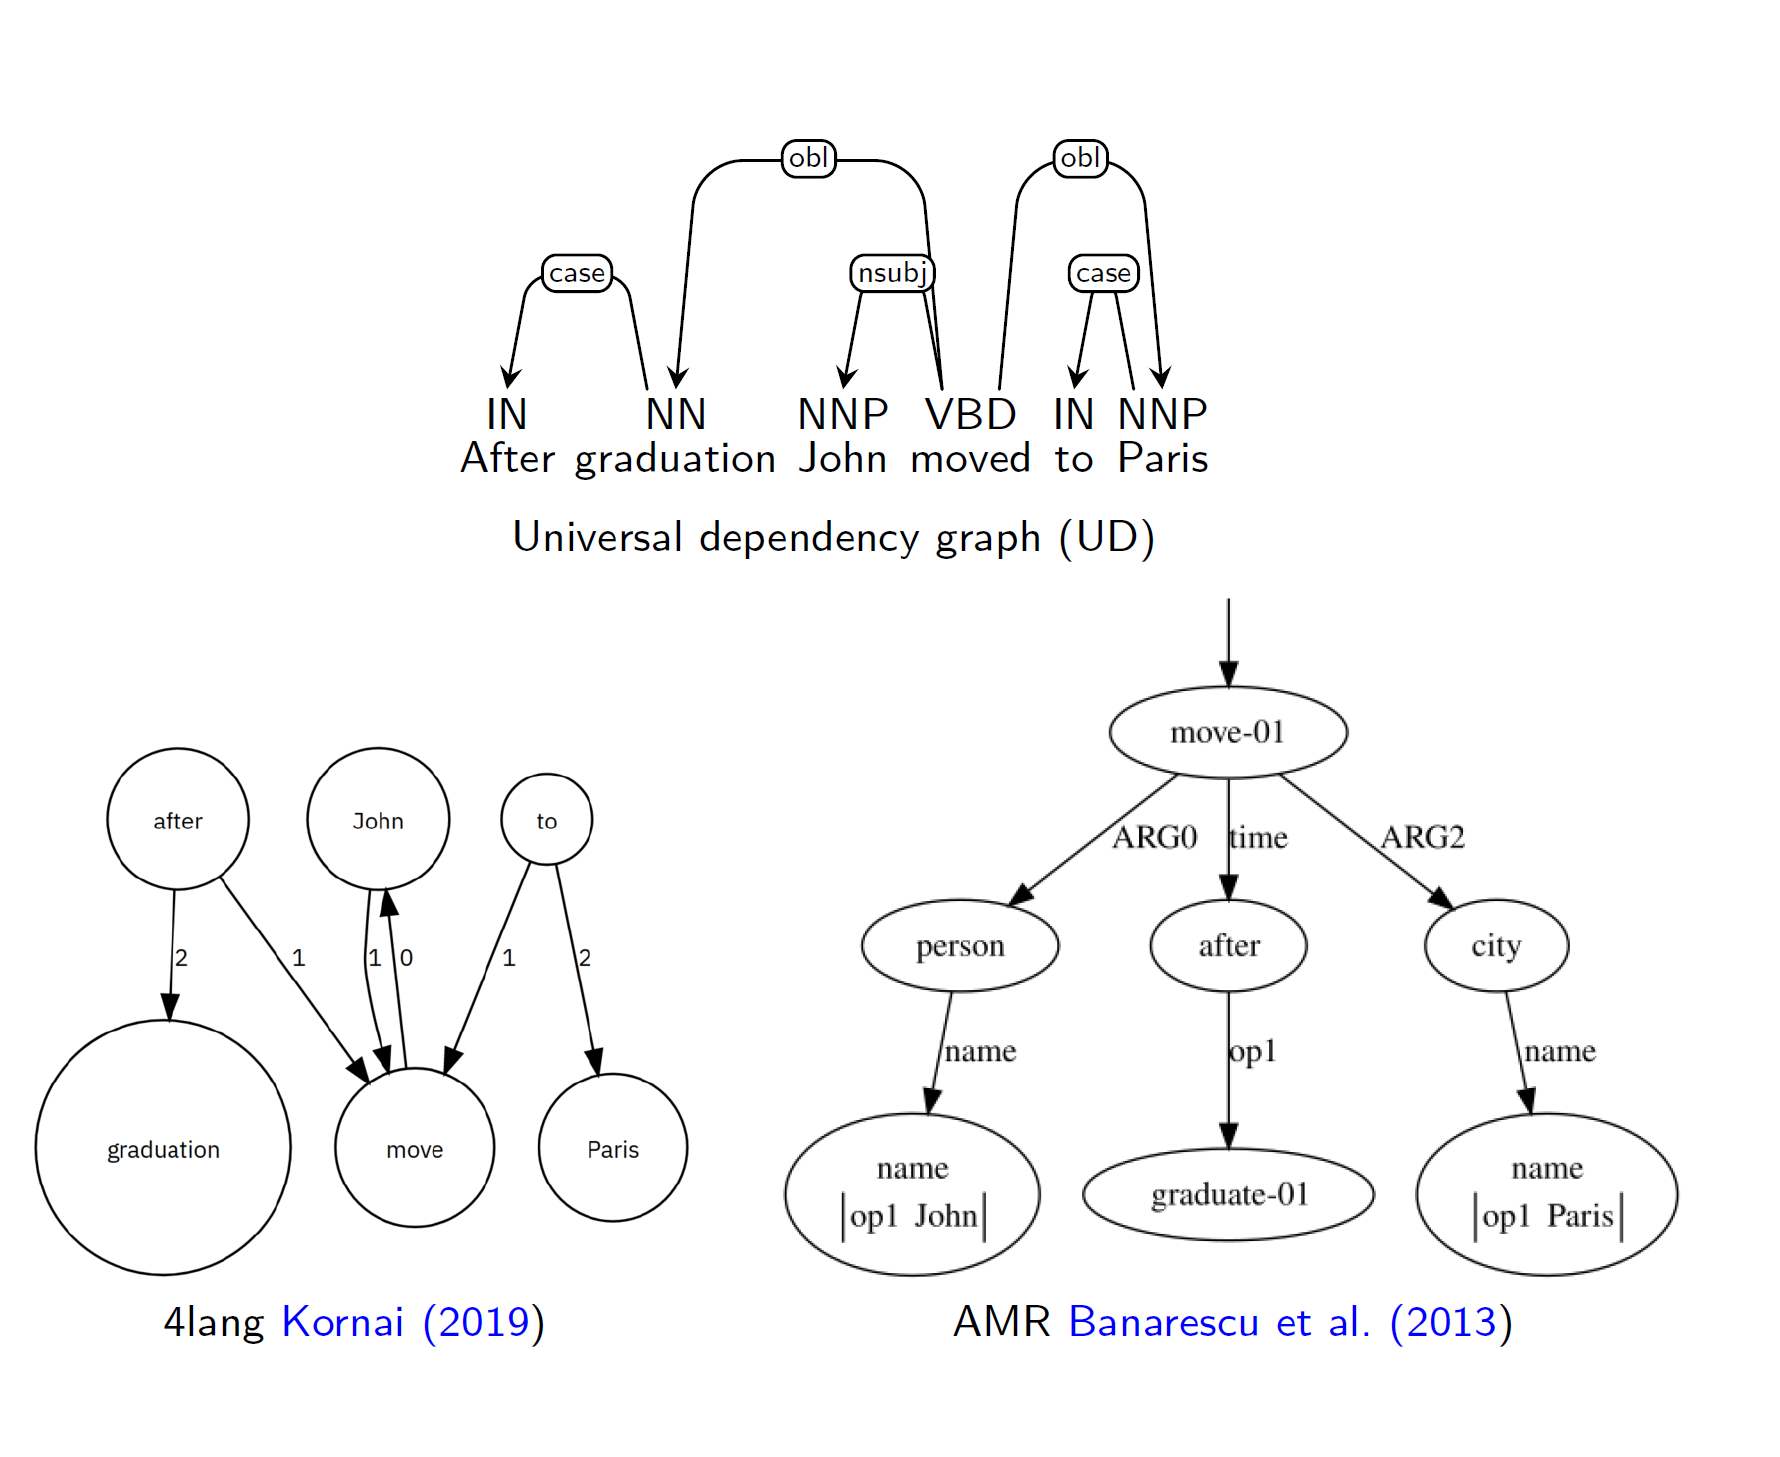
</div>

# Introduction

- A __Semantic Hypergraph__ (SH) model
- Well-known semantic parsers (UCCA, AMR) usually take advantage of Deep Learning models
- __Graphbrain__ combines symbolic and ML approaches
    - The work was performed in the context of a computational social science (CSS) research team
    - It is a formal language representation
    - They define a parser with 
     - modern NLP ML-based building blocks 
     - and random forest classifier 
     - simple search tree to parse NL to SH

__Graphbrain also__ defines: 
- __pattern language__ representable in SH itself
- a __process__ to discover knowledge inference rules. 
- They also illustrate the efficiency on variety of tasks
    - conjunction decomposition
    - open information extraction,
    - concept taxonomy inference and co-reference resolution, and an applied example of claim and conflict analysis in a news corpus.


- Traditional rule-based NLP approaches:
    - rules written by hand
    - but transparent, they follow an __open__ principle
    - but NLP tasks are diverse, they are hard to cover with rules: __strict__ principle
- ML approaches:
    - less transparent, they are __opaque__
    - but ML techniques are __adaptive__, 
- Double dichotomy: open/opaque – strict/adaptive
- Modern NLP approaches usually fall into the __opaque-adaptive__ category
- __SH__ aims to take steps into the __open-adaptive__ category

## Material

- Paper: https://arxiv.org/abs/1908.10784
- Code: https://github.com/graphbrain/graphbrain
- Docs: http://graphbrain.net/index.html

Can be installed with _pip_ under MIT license:
- _pip install graphbrain_

# Structure of SH

- The SH model is an ordered, recursive hypegraph
- A __graph__ _G = (V,E)_ is based on a vertex set _V_ and an edge set _E ⊂ V × V_ describing dyadic connections
- A __hypergraph__ _H = (V,E)_ where V is again a vertex set yet E is a set of hyperedges (ei)i∈1..M connecting an arbitrary number of vertices
- In _SH_ hyperedges may be ordered and recursive. 
    - __Ordering__: vertex position in the hyperedge is relevant. 
    - __Recursivity__: hyperedges can participate as vertices in other hyperedges. 

_SH_ completeness is assured by its dependency on UD graphs.

Similarities:
- __AMR__: based on PropBank verbal propositions and their arguments
    - goal is to purely abstract meaning
    - end-to-end parsers
    - requires extensive construction of training data
    - no pattern matching capabilities
- __4lang__: also based on UD graphs
    - completely independent of training data
    - rule-based built on UD
    - IE capabilities
    - open-strict

_Berlin is very nice_

- A set of nodes: 
    - (berlin) - noun
    - (is) - verb
    - (very) - adverb
    - (nice) - adjective
- We can build (is berlin nice) and (very nice) edges, or recursively:
    - (is berlin (very nice))
    

_Einstein developed the Theory of Relativity._
![](amr.jpg)

![](graphbrain.PNG)

## Syntax

Hyperedges have _types_, e.g.:

- (berlin) - concept
- (is) - predicate
- (is berlin nice) - relationship

- Predicates belongs to a larger type called _connectors_
- The first element of a non-atomic hyperedge must be a _connector_ (e.g. _berlin_ is an atomic edge)
- It is recursive

_(is berlin (very nice))_

- _is_ is the connector, _(berlin)_, _(very nice)_ are its arguments
- in _(very nice)_, _very_ is the connector, _nice_ is its argument

### Types

- In all, _SH_ contains 8 types
 - Types of atoms
 - Types of more complex hyperedges
- Hyperedge types are inferable from connectors and arguments

### Atomic concepts

- _Concepts_ are the most fundamental role
- Can be expressed with a single word (e.g. "dog")
- The type of an atom is expressed after the label (e.g. "dog/C")
- Expressing the type in the string is important for the parser

### Connectors

 - The second (and last) role an atoms can play are _connectors_
 - Connectors have 5 types.
 
 __Predicate__ (code is "P") used to define relations, mostly statements:
 - (__is/P__ berlin/C nice/C)
 - Gives meaning to the relation

__Modifier (M)__  applies to one hyperedge and defines a new hyperedge of the same type.

- "modifies things", can be applied to concepts, predicates or other modifiers
- e.g. (__nice/M__ shoes/C)
- note that _nice_ can be both a _concept_ or a _modifier_ in different 
- To predicates:
    - ((__not/M__ is/P) berlin/C nice/C)
- To other modifiers:
    - ((__very/M__ nice/M) shoes/C)

The __Builder (B)__ combines several concepts to create a new one.

- e.g. (capital/C) and (germany/C):
    - (__of/B__ capital/C germany/C)
- compound nouns also:
    - "guitar player" or "Barack Obama"
    - special builder type __(+/B)__ for these
    - (__+/B__ guitar/C player/C)

__Conjuncions (J)__ join or coordinate concepts or relations:
- (__and/J__ meat/C potatoes/C)
- _"Mary likes meat but hates potatoes"_:
    - (__but/J__ (likes/P mary/C meat/C) (hates/P potatoes/C))
- Special symbol (:/J)
    - Implicit sequences of related concepts
    - _"Freud, the famous psychiatrist"_:
        - (__:/J__ freud/C (the/M (famous/M psychiatrist/C)))

__Triggers (T)__ are for additional specifications of relationships
- Conditional: "We go __if__ it rains"
- Temporal: "John and Mary traveled to the North Pole __in__ 2015"
- Local: "Pablo opened abar in Spain"

_(opened/P pablo/C (a/M bar/C) (in/__T__ spain/C))_

### Hyperedge types

- capital/C and germany/C are concepts; (of/B capital/C germany/C) is also a concept
- (northern/M germany/C) is a concept (C), and (not/M is/P) is a predicate (P)

| Element types | Resulting type |
|---------------|----------------|
| (M x)         | x              |
| (B C C+)      | C              |
| (T \[CR\])    | S              |
| (P \[CRS\]+)  | P              |
| (J x y+)      | x              |

- Two more types for non-atomic edges: __relation (R)__ and __specifier (S)__
- Always as a result of composing edges
- _Relations_ state facts: (is/P Berlin/C nice/C)
- _Specifiers_ produced by triggers: (in/T 1976/C)

![](sh_types.PNG)

### Argument roles

- For _builders_ and _predicates_
- To make meaning more explicit
- To cover UD grammatical cases

- Builder: __"main (m)"__ and __"auxiliary (a)"__
    - (+/B.am tennis/C ball/C): "ball" is the main, a hypernym of the concept

_Predicates_ can induce roles the arguments play in the relation:
- (gave/P.__sio__ john/C mary/C (a/M flower/C))

Codes:

* **s**: subject
* **p**: passive subject
* **a**: agent
* **c**: subject complement
* **o**: direct object
* **i**: indirect object
* **x**: specification
* **t**: parataxis
* **j**: interjection
* **r**: relative relation
* **?**: undetermined


### Subtypes

Subtypes provide further distinctions, for example that a predicate is declarative (``Pd``), or that a concept is common (``Cc``), or that a modifier is a determinant (``Md``)::

   (is/Pd.sc (the/Md sky/Cc) blue/Cc)

For concepts we can define the following subtypes:

| Code | Subtype       | Example  |
|------|---------------|----------|
| Cc   | common        | apple/Cc |
| Cp   | proper        | mary/Cp  |
| Cn   | number        | 27/Cn    |
| Ci   | pronoun       | she/Ci   |
| Cw   | interrogative | who/Cw   |

![](atom_structure.PNG)

# Practice

In [ ]:
# Init the perser
from graphbrain.parsers import create_parser

parser = create_parser(lang="en")

In [ ]:
# Parse
graph = parser.parse("Einstein developed the Theory of Relativity.")

In [ ]:
graph

In [ ]:
edge = graph["parses"][0]["main_edge"]
print(edge)

In [ ]:
show(edge)

In [ ]:
blocks(edge)

In [ ]:
edge[2][0]

In [ ]:
edge.type()

#### Hyperedge operations

In [ ]:
from graphbrain import hedge, hgraph

edge = hedge(
    "(developed/Pd.so.<f-----/en einstein/Cp.s/en (of/Br.ma/en (the/Md/en theory/Cc.s/en) relativity/Cc.s/en))"
)

In [ ]:
edge[1::]

In [ ]:
edge[2].label()

In [ ]:
edge.subedges()

In [ ]:
edge.all_atoms()

In [ ]:
hg = hgraph("example.db")
hg.add(edge)

In [ ]:
hg.exists(edge)

In [ ]:
hg.exists(edge[1])

In [ ]:
edges = list(hg.all())

In [ ]:
edges

In [ ]:
list(hg.search("(*/P * *)"))

# From natural language to SH

- It is a hard task to annotate enough data to train a NL-SH parser
- Better infer SH from grammatically-enriched representation --> UD
- Two staged approach
     - __α-stage__: a classifier that assigns a type to each token in a given sentence. 
     - __β-stage__: is a search tree-based algorithm that recursively applies rules to build SH from sequence of atoms
- ML only in α-stage, a trivial classification problem

## α-stage

- With the usage of spaCy:
    - Segmentation 
    - Tokenization 
    - POS tags 
    - Dependency labels
    - NER
- Generate features for each token 
- spaCy model: "en_core_web_lg-2.0.0"

- __Data__:
    - fiction books
    - non-fiction books
    - news
    - scientific articles
    - Wikipedia articles
- Selected randomly 60 sentences from each (~300 sentences)
- __6936__ tokens in full for classification
- They were annotated manually for classification
- Trained a random-forest classifier

### Features

- Initial feature set:
    - POS, Dependency edge, NER
    - Word is among the most 15, 25, 50 and 100 common words (WORD15, WORD25, WORD50, WORD100)
    - Word is punctuation
    - Is it a ROOT in dep parse
    - Does it have left or right children
    - Capitalization shape ("Alice" -> Xxxxx)
    - Relative features:
        - Ones directly before or after the current one in the sentence
        - Parent of the current one in the dep tree
        - For all the relative, the above applied
- __In total 33 features candidate__

### Feature selection

- Iterative ablation procedure
- Starts with all feature candidates (33)
- 100 runs of the learning algorithm performed
    - Each run randomly splits two-third for training and one-third for testing
- The process repeated, excluding one feature at a time
- The feature that most degrades mean accuracy is excluded
    - If no negative impact --> exclude one with the highest p-value

- The procedure is repeated, ablating one feature at a time
- The procedure stops one when no remaining feature fulfills the criterias
- With p-value thresholds: .05 and .005
- The final feature set contained 5 feature: F5 = {TAG, DEP, HDEP, HPOS, POS_AFTER}

![](feature_eval.PNG)

## β-stage

- This stage transforms the sequence of atoms into a semantic hyperedge
- It follows the α-stage
- A bottom up process:
    - Aggregates the deeper structure into a more complex one
    - Recursively combines hyperedges into a final, well-formed hyperedge

#### Algorithm

| Element types | Resulting type |
|---------------|----------------|
| (M x)         | x              |
| (B C C+)      | C              |
| (T \[CR\])    | S              |
| (P \[CRS\]+)  | P              |
| (J x y+)      | x              |

- The process starts with the typed atoms of the original sentence
- At each step the current hyperedge is scanned from left to right to match a rule

- If there are two matches:
    - The algorithm assign a higher score to sub-sequences where all items are directly connected in UD
    - In of tie, the function prefers sequence that contains the deepest atom in the UD tree
    - If still a tie, rules are ordered empirically
- If no match, the first two is connected with special conjunction (:/J)
- This guarantees a valid SH at the end

After this, __Argument roles__ are inferred from dependency labels.

![](transform.PNG)

## Validation

- The methods were manually tested on 100 sentences
- These sentences were not part of the training or the test sets

![](validation.PNG)

## Summary

- Lots of similarities with our methods in 4lang (built on UD)
- Only English support, but could be expanded to new languages
- With feature-selection only keeping 3 features wasn't that much worse
    - 3 features could be described programmatically --> no need for ML, the whole method is interpretable

# Applications
## Open-Information Extraction

- Domain-free extraction from text of tuples (typically triplets) representing semantic relationships
- Differs from RE tasks as the relationships are not given
- The task is to extract all kinds of tuples possible
- In the SH model it is possible to define a small set of tuples to achieve comparable results

# Pattern language

- Patterns are hyperedges themselves
- Patterns are defined with the help of special atoms: wildcards and variables.
- The former are useful for simply querying and matching, while the latter allow for the extraction of specific parts of a hyperedge.

We will demonstrate the pattern language of SH on the [WiRe57 : A Fine-Grained Benchmark for Open Information Extraction](https://arxiv.org/abs/1809.08962) dataset.

In [ ]:
import json

data = {}

with open("WiRe57_343-manual-oie.json") as f:
    data = json.load(f)

After loading, we extract triplets and texts from the dataset:

In [ ]:
texts = []
triplets = []

for k in data:
    for v in data[k]:
        texts.append(v["sent"])

        triplets_by_sentence = []
        for t in v["tuples"]:
            triplets_by_sentence.append(
                {
                    "REL": t["rel"]["text"],
                    "ARG1": t["arg1"]["text"],
                    "ARG2": t["arg2"]["text"],
                }
            )

        triplets.append(triplets_by_sentence)

In [ ]:
texts[1]

In [ ]:
triplets[2]

Now, lets use our parser to parse the dataset into _SH_ format.

In [ ]:
from tqdm import tqdm

edges = []

for text in tqdm(texts):
    edges.append(parser.parse(text)["parses"][0]["main_edge"])

In [ ]:
edges[1]

In [ ]:
vblocks(edges[1])

In [ ]:
from graphbrain.hyperedge import match_pattern

patt = hedge("is/P.sc ARG1 ARG2")

m = match_pattern(edges[1], patt)

In [ ]:
m

In [ ]:
m[0]["ARG1"].label()

In [ ]:
m[0]["ARG2"].all_atoms()[-1].label()

In [ ]:
hg = hgraph("wire.db")

for edge in edges:
    hg.add(edge)


def pattern_to_triplet(patt, edges):
    for i, edge in enumerate(edges):
        for e in edge.subedges():
            if not e.is_atom():
                m = match_pattern(e, patt)
                if m:
                    args = m[0]

                    pattern_triplet = {}

                    for k in args:
                        pattern_triplet[k] = args[k]
                    pattern_triplet["text"] = texts[i]

                    yield pattern_triplet

In [ ]:
print(texts[2])
blocks(edges[2])

In [ ]:
from graphbrain.utils.conjunctions import *

con_edges = conjunctions_decomposition(edges[2], concepts=True)

for e in con_edges:
    print(e)

In [ ]:
match_pattern(con_edges[1], "is/P.sc ARG1 ARG2")

In [ ]:
from graphbrain.patterns import PatternCounter

pc = PatternCounter()

In [ ]:
for e in hg.all():
    if hg.is_primary(e):
        pc.count(e)

In [ ]:
patts = pc.patterns.most_common()

patts

In [ ]:
pc = PatternCounter()
for edge in edges:
    pc.count(edge)

patts = pc.patterns.most_common()

patts

In [ ]:
pc = PatternCounter(expansions={"(*/P * * ...)"})
for edge in edges:
    if hg.is_primary(edge):
        pc.count(edge)

patts = pc.patterns.most_common()

patts[:10]

In [ ]:
for t in pattern_to_triplet("(REL/P ARG1/C ARG2/C ...)", edges):
    print(
        f"REL: {t['REL'].label()}, ARG1: {t['ARG1'].label()}, ARG2: {t['ARG2'].label()} \n TEXT: {t['text']}"
    )  
    print()

![](patterns.PNG)

![](results.PNG)

- The method of defining patterns in HITL is similar to the main idea of POTATO

- "_Another possible improvement is in the domain of software and user-interface development, allowing for
less technical users to provide inferences and feedback –
a user can be invited to directly select parts of a sentence
and assigning them to meanings (e.g. “actor”, “claim”,
“aggressor”, etc.), without having to see or interact with
hypergraphic notation. Such refinements are beyond the
scope of this work, but it is our hope to lay the foundations for these and other possibilities._"